<a href="https://colab.research.google.com/github/MittalNeha/detr-panoptic/blob/main/construction_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ining

# Training

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Ground truth dataset

In [2]:
!unzip -q /gdrive/MyDrive/EVA6/CAPSTONE/panoptic.zip

In [3]:
!git clone https://github.com/MittalNeha/Extensive_Vision_AI6.git

Cloning into 'Extensive_Vision_AI6'...
remote: Enumerating objects: 549, done.
remote: Counting objects: 100% (549/549), done.
remote: Compressing objects: 100% (466/466), done.
remote: Total 549 (delta 251), reused 167 (delta 59), pack-reused 0
Receiving objects: 100% (549/549), 10.70 MiB | 18.90 MiB/s, done.
Resolving deltas: 100% (251/251), done.


In [4]:
!cp -r /content/Extensive_Vision_AI6/CAPSTONE/detr/ .
!mkdir /content/detr/weights

#get resnet-50 weights
!wget https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth --directory-prefix=/content/detr/weights
# !cp -r /gdrive/MyDrive/EVA6/CAPSTONE/output/ /content/detr/weights
%cd detr

--2021-09-23 17:48:44--  https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166618694 (159M) [application/octet-stream]
Saving to: ‘/content/detr/weights/detr-r50-e632da11.pth’

detr-r50-e632da11.p 100%[===================>] 158.90M  55.8MB/s    in 2.9s    

2021-09-23 17:48:47 (55.8 MB/s) - ‘/content/detr/weights/detr-r50-e632da11.pth’ saved [166618694/166618694]

/content/detr


Train command

In [5]:
! pip install git+https://github.com/cocodataset/panopticapi.git

  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-req-build-4m61vbvw
  Running command git clone -q https://github.com/cocodataset/panopticapi.git /tmp/pip-req-build-4m61vbvw
  Created wheel for panopticapi: filename=panopticapi-0.1-py3-none-any.whl size=8306 sha256=00c5f2369f2227439b47ae888bc7583164fad16f71f10647a9b27c50110bcfd3
  Stored in directory: /tmp/pip-ephem-wheel-cache-spdjfh6e/wheels/ad/89/b8/b66cce9246af3d71d65d72c85ab993fd28e7578e1b0ed197f1
Successfully built panopticapi


In [ ]:
!python main.py --dataset_file materials --data_path ../coco_panoptic/ --output_dir /gdrive/MyDrive/EVA6/CAPSTONE/output --resume /content/detr/weights/detr-r50-e632da11.pth
# weights/output/checkpoint.pth

Not using distributed mode
fatal: not a git repository (or any of the parent directories): .git
git:
  sha: N/A, status: clean, branch: N/A

Namespace(aux_loss=True, backbone='resnet50', batch_size=2, bbox_loss_coef=5, clip_max_norm=0.1, coco_panoptic_path=None, data_path='../coco_panoptic/', dataset_file='materials', dec_layers=6, device='cuda', dice_loss_coef=1, dilation=False, dim_feedforward=2048, dist_url='env://', distributed=False, dropout=0.1, enc_layers=6, eos_coef=0.1, epochs=300, eval=False, frozen_weights=None, giou_loss_coef=2, hidden_dim=256, lr=0.0001, lr_backbone=1e-05, lr_drop=200, mask_loss_coef=1, masks=False, nheads=8, num_queries=100, num_workers=2, output_dir='/gdrive/MyDrive/EVA6/CAPSTONE/output', position_embedding='sine', pre_norm=False, remove_difficult=False, resume='/content/detr/weights/detr-r50-e632da11.pth', seed=42, set_cost_bbox=5, set_cost_class=1, set_cost_giou=2, start_epoch=0, weight_decay=0.0001, world_size=1)
number of params: 41305195
loading ann

#panoptic

In [ ]:
!python main.py --batch_size 1 --masks --epochs 25 --lr_drop 15 --data_path ../coco_panoptic/  --coco_panoptic_path ../coco_panoptic/annotations/  --dataset_file coco_panoptic --frozen_weights /gdrive/MyDrive/EVA6/CAPSTONE/output/checkpoint.pth --output_dir output/segm_model


Not using distributed mode
fatal: not a git repository (or any of the parent directories): .git
git:
  sha: N/A, status: clean, branch: N/A

Namespace(aux_loss=True, backbone='resnet50', batch_size=1, bbox_loss_coef=5, clip_max_norm=0.1, coco_panoptic_path='../coco_panoptic/annotations/', data_path='../coco_panoptic/', dataset_file='coco_panoptic', dec_layers=6, device='cuda', dice_loss_coef=1, dilation=False, dim_feedforward=2048, dist_url='env://', distributed=False, dropout=0.1, enc_layers=6, eos_coef=0.1, epochs=25, eval=False, frozen_weights='/gdrive/MyDrive/EVA6/CAPSTONE/output/checkpoint.pth', giou_loss_coef=2, hidden_dim=256, lr=0.0001, lr_backbone=1e-05, lr_drop=15, mask_loss_coef=1, masks=True, nheads=8, num_queries=100, num_workers=2, output_dir='output/segm_model', position_embedding='sine', pre_norm=False, remove_difficult=False, resume='', seed=42, set_cost_bbox=5, set_cost_class=1, set_cost_giou=2, start_epoch=0, weight_decay=0.0001, world_size=1)
number of params: 13336

In [ ]:
import gc
import torch

gc.collect()

torch.cuda.empty_cache()

In [ ]:
!rm -rf Extensive_Vision_AI6/
!rm -rf detr

# Panoptic Detr Experiments to combine with the instance mask.

In [ ]:
! pip install git+https://github.com/cocodataset/panopticapi.git

  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-req-build-81l8np0u
  Running command git clone -q https://github.com/cocodataset/panopticapi.git /tmp/pip-req-build-81l8np0u
  Created wheel for panopticapi: filename=panopticapi-0.1-py3-none-any.whl size=8306 sha256=12b09aaa1343aa8d3ecaefa60d6995d4138b392f9f055e14895e48c0f9cecb72
  Stored in directory: /tmp/pip-ephem-wheel-cache-bsajcg0u/wheels/ad/89/b8/b66cce9246af3d71d65d72c85ab993fd28e7578e1b0ed197f1
Successfully built panopticapi


In [ ]:
import panopticapi
from panopticapi.utils import id2rgb, rgb2id
from PIL import Image

In [ ]:
import torch
from torch import nn
from torchvision.models import resnet50
import torchvision.transforms as T
import numpy
torch.set_grad_enabled(False);

In [ ]:
import io
import math
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [ ]:
var_a = [[1,2,3],[4,5,6],[7,8,9]]
var_a = tuple(var_a)

In [ ]:
len(var_a)

3

In [ ]:
for a in var_a:
    print(a)

[1, 2, 3]
[4, 5, 6]
[7, 8, 9]


In [ ]:
#Helpers
# standard PyTorch mean-std input image normalization
transform = T.Compose([
    T.Resize(800),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
im = Image.open('img_014.png')

In [ ]:
import requests

In [ ]:
url = "http://images.cocodataset.org/val2017/000000281759.jpg"
im = Image.open(requests.get(url, stream=True).raw)

In [ ]:
im = Image.open('img_245.png')

In [ ]:
model, postprocessor = torch.hub.load('facebookresearch/detr', 'detr_resnet101_panoptic', pretrained=True, return_postprocessor=True, num_classes=250)
model.eval();

# mean-std normalize the input image (batch-size: 1)
img = transform(im).unsqueeze(0)
out = model(img)
scores = out["pred_logits"].softmax(-1)[..., :-1].max(-1)[0]
# threshold the confidence
keep = scores > 0.85

#get the class labels.
prob = out["pred_logits"].softmax(-1)
scores, labels = prob[..., :-1].max(-1)

# gt_labels = labels[keep]
# gt_mask = out["pred_masks"][keep]

#This gives the result as {"png_string": out.getvalue(), "segments_info": segments_info}
result = postprocessor(out, torch.as_tensor(img.shape[-2:]).unsqueeze(0))[0]
# ^ Need to make changes in postprocessor for overlapping the segment for the custom class dataset.

# this result will give id that can be used for the segment_info id, needed for the panoptic mask in the datsbase
panoptic_seg = Image.open(io.BytesIO(result['png_string']))
panoptic_seg = numpy.array(panoptic_seg, dtype=numpy.uint8).copy()
# We retrieve the ids corresponding to each mask
panoptic_seg_id = rgb2id(panoptic_seg)

Downloading: "https://github.com/facebookresearch/detr/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

Downloading: "https://dl.fbaipublicfiles.com/detr/detr-r101-panoptic-40021d53.pth" to /root/.cache/torch/hub/checkpoints/detr-r101-panoptic-40021d53.pth


  0%|          | 0.00/237M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/nn/fun

In [ ]:
custom_class_mask  = image_binary

In [ ]:
mask = out["pred_masks"][keep]
mask.shape

torch.Size([5, 200, 369])

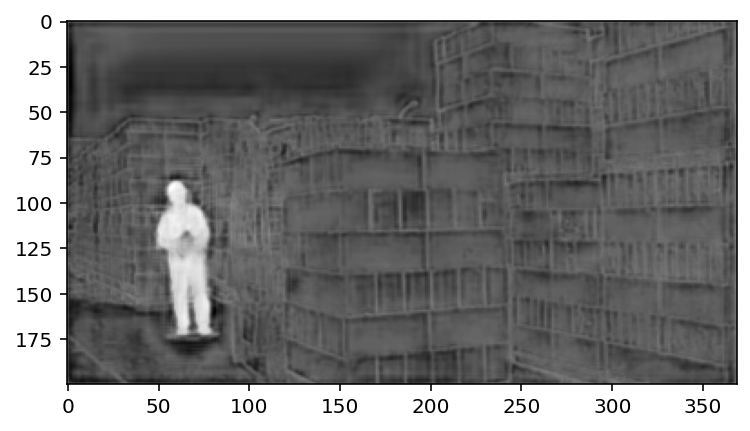

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(mask[1], 'gray')

In [ ]:
mask_add = cv.normalize(custom_class_mask, None, alpha=0, beta=2, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)

In [ ]:
print(out["pred_masks"].shape[-2:])
mask_add.shape

torch.Size([200, 369])


(660, 1216)

In [ ]:
#downscale the mask to the size of other masks
# custom_mask = mask_add.resize(size=(out["pred_masks"].shape[-2:]), resample=Image.NEAREST)
custom_mask = cv.resize(mask_add, (out["pred_masks"].shape[-1], out["pred_masks"].shape[-2]), interpolation=cv.INTER_NEAREST)

# convert to tensor
custom_mask = torch.from_numpy(custom_mask)
print(custom_mask.shape)

torch.Size([200, 369])


In [ ]:
#Flatten the custom class mask and concatenate to the others
custom_mask = torch.unsqueeze(custom_mask.flatten(), 1)

#flatten the masks from the input image
mask = mask.flatten(1)
m_id = mask.transpose(0, 1).softmax(-1)

In [ ]:
a = torch.cat((m_id, custom_mask), 1)
print(a)

tensor([[3.0883e-02, 9.9294e-07, 2.2641e-04, 3.9935e-08, 9.6889e-01, 0.0000e+00],
        [5.4735e-03, 1.1295e-09, 3.7765e-06, 9.1320e-12, 9.9452e-01, 0.0000e+00],
        [2.9801e-03, 4.0050e-10, 1.9129e-06, 2.3033e-12, 9.9702e-01, 0.0000e+00],
        ...,
        [9.9638e-01, 3.1708e-07, 5.4762e-04, 1.5941e-09, 3.0699e-03, 2.0000e+00],
        [9.9155e-01, 4.7335e-06, 1.8809e-03, 6.7694e-08, 6.5673e-03, 2.0000e+00],
        [9.5565e-01, 4.0963e-04, 1.4384e-02, 2.6687e-05, 2.9530e-02, 2.0000e+00]])


In [ ]:
a.shape

torch.Size([73800, 6])

In [ ]:
custom_mask.shape

torch.Size([73800, 1])

In [ ]:
m_id.shape

torch.Size([73800, 5])

In [ ]:
mm = m_id.argmax(-1)

In [ ]:
mm.shape

torch.Size([73800])

In [ ]:
mm[18000: 18300]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
mm.unique()

tensor([0, 1, 2, 3, 4])

In [ ]:
labels[keep]

tensor([197,   1, 191,  84, 187])

In [ ]:
mm_new = a.argmax(-1)
mm_new[18000: 18300]

tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [ ]:
mm_new.unique()

tensor([0, 1, 2, 3, 4, 5])

In [ ]:
panoptic_seg = Image.open(io.BytesIO(result['png_string']))
panoptic_seg = numpy.array(panoptic_seg, dtype=numpy.uint8).copy()
# We retrieve the ids corresponding to each mask
panoptic_seg_id = rgb2id(panoptic_seg)

In [ ]:
panoptic_seg.shape

(800, 1473, 3)

In [ ]:
panoptic_seg = Image.open(io.BytesIO(result['png_string']))
panoptic_seg.save('out.png')

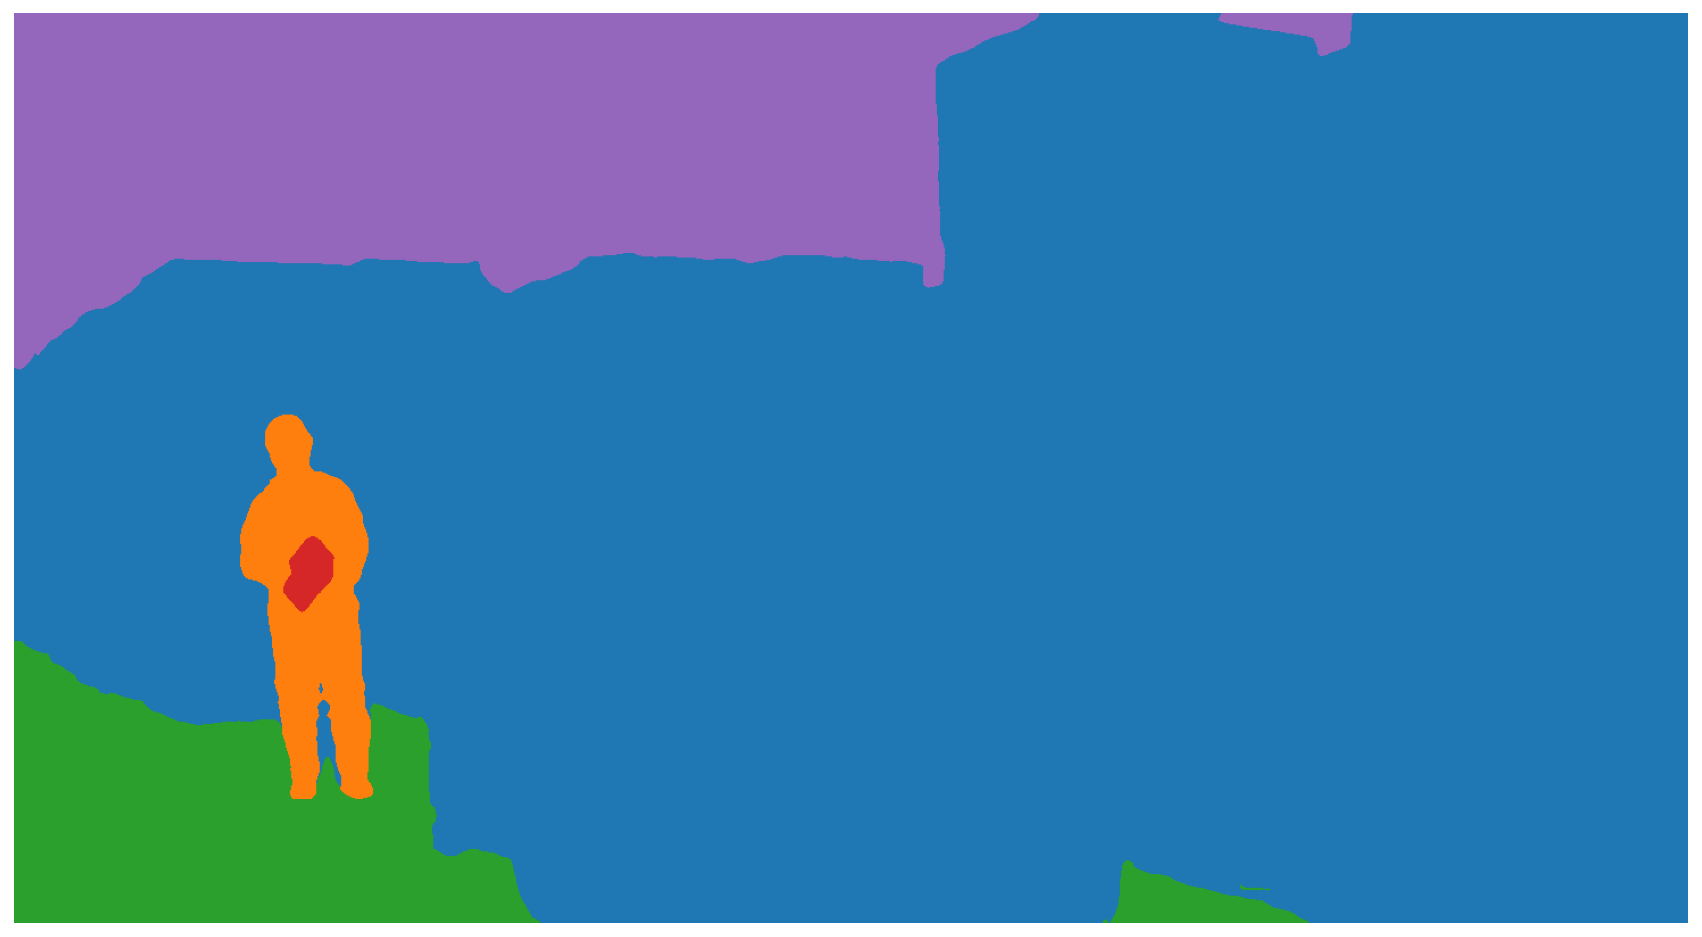

In [ ]:
import itertools
import seaborn as sns
palette = itertools.cycle(sns.color_palette())

# The segmentation is stored in a special-format png
panoptic_seg = Image.open(io.BytesIO(result['png_string']))
panoptic_seg = numpy.array(panoptic_seg, dtype=numpy.uint8).copy()
# We retrieve the ids corresponding to each mask
panoptic_seg_id = rgb2id(panoptic_seg)

# Finally we color each mask individually
panoptic_seg[:, :, :] = 0
for id in range(panoptic_seg_id.max() + 1):
  panoptic_seg[panoptic_seg_id == id] = numpy.asarray(next(palette)) * 255
plt.figure(figsize=(15,15))
plt.imshow(panoptic_seg)
plt.axis('off')
plt.show()

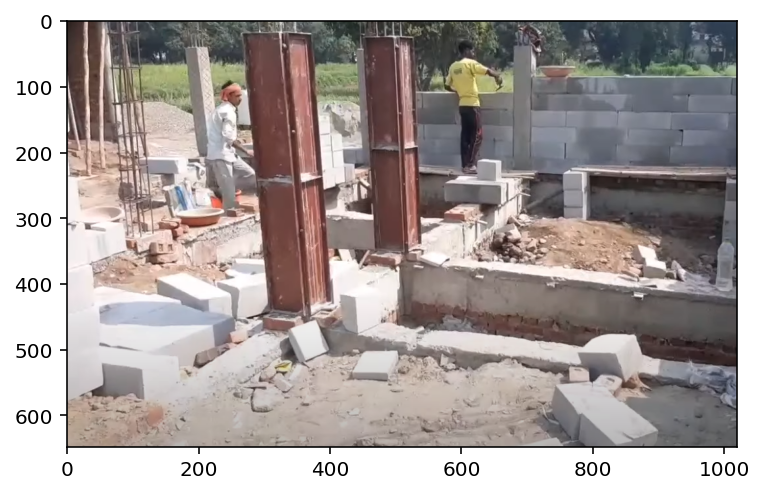

In [ ]:
plt.imshow(im)

## Create mask from dataset json

In [ ]:
del segment

In [ ]:
import json
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
inst_segment_j = json.load(open('coco.json'))

In [ ]:
# "file_name": "img_014.png"
# "id": 86,

# "id": 62,            "file_name": "img_038.png",

In [ ]:
img.height

660

In [ ]:
# test_img = Image.open('img_245.png')
# points = np.array(segment).reshape(-1, 2)

In [ ]:
# polygons = []
# for annot in inst_segment_j["annotations"]:
#     if annot["image_id"] == 119:
#         print(annot['id'])
#         segment = annot["segmentation"]
#         points = np.array(segment).reshape(-1,2)
#         for idx in range(len(points)):
#             points[idx][1] = test_img.height - points[idx][1]
#         p = Polygon(points, facecolor='k')
#         polygons.append(p)
#         # break

261
262


In [ ]:
import cv2 as cv

In [ ]:
contours = []
for annot in inst_segment_j["annotations"]:
    if annot["image_id"] == 119:
        print(annot['id'])
        segment = annot["segmentation"]
        points = np.array(segment, dtype=np.int32).reshape(-1,2)
        # for idx in range(len(points)):
        #     points[idx][1] = img.height - points[idx][1]
        # p = Polygon(points, facecolor='k')
        contours.append(points)


261
262


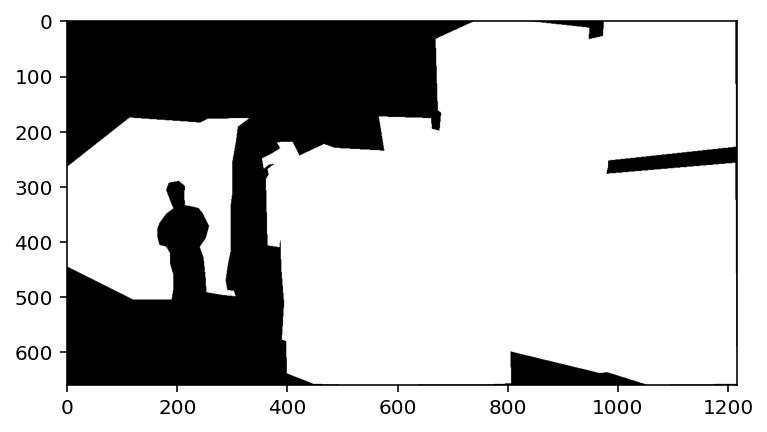

In [ ]:
test_img = cv.imread("img_245.png", cv.IMREAD_COLOR)
image_binary = np.zeros((test_img.shape[0],
                         test_img.shape[1], 1),
                        np.uint8)

cv.drawContours(image_binary, contours, -1, (255, 255, 255), -1)
plt.imshow(image_binary.squeeze(), cmap='gray')

In [ ]:
cv.imwrite("image_mask.png", image_binary)

True

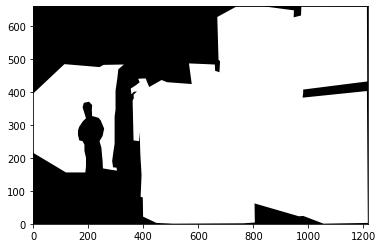

In [ ]:
from matplotlib.collections import PatchCollection

fig,ax = plt.subplots()
ax.set_facecolor((0,0,0))


p_out = PatchCollection(polygons,facecolors=(1,1,1), linewidths=0, alpha=1)
ax.add_collection(p_out)

ax.set_xlim([0,img.width])
ax.set_ylim([0,img.height])
plt.show()

In [ ]:
fig.co

In [ ]:
fig.savefig('test2.jpeg')

In [ ]:
plt.savefig('test.png')

<Figure size 432x288 with 0 Axes>

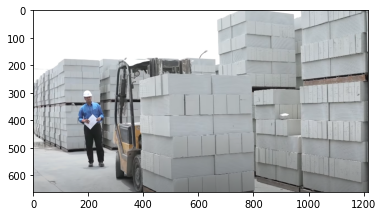

In [ ]:
plt.imshow(Image.open('img_245.png'))

In [ ]:
custom_class_mask.height

288

#Experimental code

In [ ]:
import os
from PIL import Image

In [ ]:
#@ oprn all train images to check if the format is different from rgb

for idx, d in enumerate(os.listdir('parsed_data/materials_train')):

In [ ]:
%cd ..

/content


In [ ]:
for root, dir, files in os.walk('parsed_data/materials_train'):
    # print(root)
    # print("----------------")
    # print(files)
    # print("XXXXXXXXXXXXXXX")
    for filename in files:
        orig_image = Image.open(root+'/'+filename)
        if orig_image.mode != 'RGB':
            orig_image.convert('RGB')
            print("{} has mode {}".format(root+'/'+filename, orig_image.mode))
        orig_image.close()

NameError: ignored